Logisitc Regression
=========================

## Classifying data with a linear decision boundary

*This example shows how logisitc regression can be use to categorise data using a linear decision boundary. This is a supervised learning technique that uses labeled training data*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots. Scipy is also used here for optimisation during training. 

In [43]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt # for optimisation

### Load Data

In [44]:
data = np.loadtxt("../data/ex2data1.txt",delimiter=',')
x_data = data[:,[0,1]]
y_data = data[:,2]

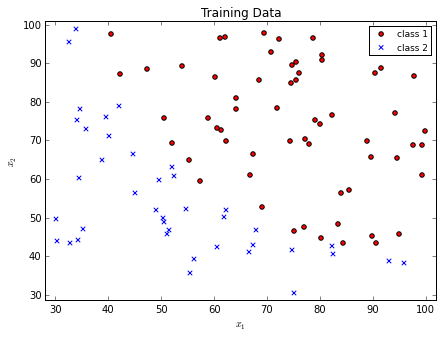

In [56]:
pos,neg = np.where(y_data==1),np.where(y_data==0)
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.xlim([min(x_data[:,0]-2),max(x_data[:,0])+2])
plt.ylim([min(x_data[:,1]-2),max(x_data[:,1])+2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Training Data")
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

### Define variables based on trainng data

In [45]:
m = float(np.shape(x_data)[0])  # m training samples
n = np.shape(x_data)[1]         # n features

### Sigmoid activation function

$g(z) = \frac{1}{1+e^{-z}}$

In [46]:
def sigmoid(z):

    return np.divide(1.0, (np.add(1.0,np.exp(-z)) ) )

### Cost Function and Gradient
$h_{\theta}(x) = g(\theta^T x)$

$J(\theta) = \frac{1}{m} \sum^m_{i=1} [-y^{(i)} log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$

where $i$ is the sample index ($i = 1,2,...,m$)

$\frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}$

where $j$ is the index in each feature $x$ and weight $\theta$ ($j = 0,1,2,...,n$)

In [47]:
def costFunc(theta,X,y,m):

    H = sigmoid(np.dot(X,theta))
    return (1 / m) * np.sum( -np.transpose(y)*np.log(H) - np.transpose(1-y)*np.log((1 - H) + 1e-7) )

In [48]:
def gradFunc(theta,X,y,m):

    H = sigmoid(np.dot(X,theta))
    return (1/m) * np.dot(np.transpose(X),(H - y)) 

### Intialise $\theta$ and compute cost and gradient

In [49]:
# add column of 1s
X = np.column_stack((np.ones(int(m)),x_data))

# Initial theata
theta = np.zeros(n+1)

# Compute and display initial cost and gradient
cost = costFunc(theta,X,y_data,m)
grad = gradFunc(theta,X,y_data,m)

print '\nCost at initial theta (zeros): ', cost
print 'Gradient at initial theta (zeros): ', grad, '\n'


Cost at initial theta (zeros):  0.69314710056
Gradient at initial theta (zeros):  [ -0.1        -12.00921659 -11.26284221] 



### Train

In [50]:
theta_opt = opt.fmin_bfgs(costFunc, theta, fprime=gradFunc, args=(X, y_data,m),disp=False)
cost = costFunc(theta_opt,X,y_data,m) 

print '\nCost at theta at optimum: ', cost
print 'theta: ', theta_opt, '\n'


Cost at theta at optimum:  0.203497632154
theta:  [-25.16132391   0.20623166   0.20147151] 



### Decision Boundary

The decision boundary is of the form:

$ y = mx + c = \theta_0 + \theta_1 x_1$

if $y = x_2$, then:

$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 \leq 0 $

so we want to plot the line given by:

$x_2 = - \frac{\theta_0}{\theta_{2}} -  \frac{\theta_1}{\theta_2}x_1$

In [51]:
def decision_boundary(xpoints,theta):
    return -np.divide(theta[0],theta[2]) - np.multiply(np.divide(theta[1],theta[2]),xpoints)

In [52]:
# Calculate the desicision boundary
xpoints = np.linspace(min(x_data[:,0])-2,max(x_data[:,0]+2),num=m+4)
boundary = decision_boundary(xpoints,theta_opt)

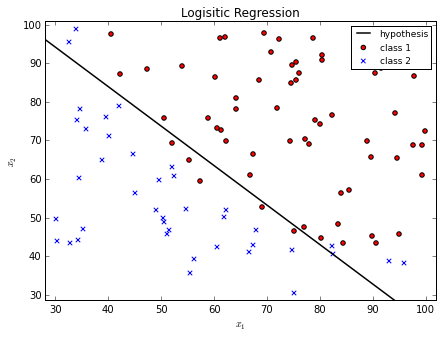

In [57]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.plot(xpoints,boundary,linewidth=1.5,c='k', label='hypothesis')
plt.xlim([min(x_data[:,0]-2),max(x_data[:,0])+2])
plt.ylim([min(x_data[:,1]-2),max(x_data[:,1])+2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Logisitic Regression")
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

### Predict class for new point

Using our learnt values of $\theta$, we can predict which class a new data point should belong to.

In [53]:
# Point for classification
point = [45,85]
# Probability of point (x1=45,x2=85) being part of class 1
prob = sigmoid(np.dot([1, point[0], point[1]], theta_opt))
print "Probability of new data point being part of class 1: ", prob

Probability of new data point being part of class 1:  0.776290597692


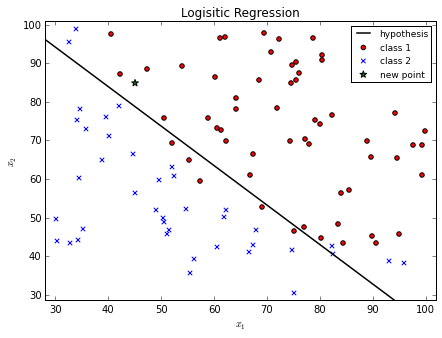

In [58]:
fig = plt.figure(figsize=(7, 5),facecolor='w', edgecolor='k')
plt.scatter(x_data[pos,0],x_data[pos,1], marker='o',c='r',label='class 1')
plt.scatter(x_data[neg,0],x_data[neg,1], marker='x',c='b', label='class 2')
plt.plot(xpoints,boundary,linewidth=1.5,c='k', label='hypothesis')
plt.xlim([min(x_data[:,0]-2),max(x_data[:,0])+2])
plt.ylim([min(x_data[:,1]-2),max(x_data[:,1])+2])
plt.scatter(point[0],point[1],marker='*',c='green',s=50,label='new point')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Logisitic Regression")
plt.legend(loc='best', prop={'size':9},scatterpoints=1)
plt.show()

### Accuracy on training set

For this notebook we are just going to look at the accuracy on the training data but in practise you may want to split your data and test the accuracy on unseen data points too.

In [54]:
def accuracy(theta,X,labels):
    p = sigmoid(np.dot(X, theta))>=0.5 
    return np.mean(p == labels) * 100.0

In [55]:
# Predict Accuracy on Training Set
print "Accuracy on Training Set: ", accuracy(theta_opt,X,y_data), "%"

Accuracy on Training Set:  89.0 %
